# Exam 2
# Author: Elias Nicolas
# Special Thanks: Diego Cardenas, Emily Hernandez, Colton Buxkemper, Lizbeth Montoya, Christoper Norman

In [141]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [142]:
flight_file_name = 'flights'
flight_file_location = 'https://joannabieri.com/introdatascience/data/'+flight_file_name+'.csv'
DF_flight = pd.read_csv(flight_file_location)
DF_flight

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,2013-01-01 10:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,2013-01-01 10:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,2013-01-01 10:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,2013-01-01 10:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,2013-01-01 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213.0,14.0,55.0,2013-09-30 18:00:00
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198.0,22.0,0.0,2013-10-01 02:00:00
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764.0,12.0,10.0,2013-09-30 16:00:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419.0,11.0,59.0,2013-09-30 15:00:00


In [143]:
airport_file_name = 'airports'
airport_file_location = 'https://joannabieri.com/introdatascience/data/'+airport_file_name+'.csv'
DF_airport = pd.read_csv(airport_file_location)
DF_airport

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044.0,-5.0,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264.0,-6.0,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801.0,-6.0,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523.0,-5.0,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11.0,-5.0,A,America/New_York
...,...,...,...,...,...,...,...,...
1453,ZUN,Black Rock,35.083228,-108.791778,6454.0,-7.0,A,America/Denver
1454,ZVE,New Haven Rail Station,41.298669,-72.925992,7.0,-5.0,A,America/New_York
1455,ZWI,Wilmington Amtrak Station,39.736667,-75.551667,0.0,-5.0,A,America/New_York
1456,ZWU,Washington Union Station,38.897460,-77.006430,76.0,-5.0,A,America/New_York


In [144]:
airlines_file_name = 'airlines'
airlines_file_location = 'https://joannabieri.com/introdatascience/data/'+airlines_file_name+'.csv'
DF_airlines = pd.read_csv(airlines_file_location)
DF_airlines

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.
5,EV,ExpressJet Airlines Inc.
6,F9,Frontier Airlines Inc.
7,FL,AirTran Airways Corporation
8,HA,Hawaiian Airlines Inc.
9,MQ,Envoy Air


In [145]:
planes_file_name = 'planes'
planes_file_location = 'https://joannabieri.com/introdatascience/data/'+planes_file_name+'.csv'
DF_planes = pd.read_csv(planes_file_location)
DF_planes

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan
...,...,...,...,...,...,...,...,...,...
3317,N997AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,NaN,Turbo-fan
3318,N997DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS AIRCRAFT CO,MD-88,2,142,NaN,Turbo-fan
3319,N998AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,NaN,Turbo-fan
3320,N998DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS CORPORATION,MD-88,2,142,NaN,Turbo-jet


In [146]:
weather_file_name = 'weather'
weather_file_location = 'https://joannabieri.com/introdatascience/data/'+weather_file_name+'.csv'
DF_weather = pd.read_csv(weather_file_location)
DF_weather

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01 06:00:00
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01 07:00:00
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01 08:00:00
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01 09:00:00
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01 10:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26110,LGA,2013,12,30,14,35.96,19.94,51.78,340.0,13.80936,21.86482,0.0,1017.1,10.0,2013-12-30 19:00:00
26111,LGA,2013,12,30,15,33.98,17.06,49.51,330.0,17.26170,21.86482,0.0,1018.8,10.0,2013-12-30 20:00:00
26112,LGA,2013,12,30,16,32.00,15.08,49.19,340.0,14.96014,23.01560,0.0,1019.5,10.0,2013-12-30 21:00:00
26113,LGA,2013,12,30,17,30.92,12.92,46.74,320.0,17.26170,NaN,0.0,1019.9,10.0,2013-12-30 22:00:00


## P. Preliminaries

In [147]:
flight_obv = DF_flight.shape[0]
flight_var = DF_flight.shape[1]

print(f"Number of observations for the flights DF: {flight_obv}")
print(f"Number of variables for the flights DF: {flight_var}")

Number of observations for the flights DF: 336776
Number of variables for the flights DF: 19


In [148]:
DF_flight.dtypes

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance          float64
hour              float64
minute            float64
time_hour          object
dtype: object

In [149]:
weather_obv = DF_weather.shape[0]
weather_var = DF_weather.shape[1]

print(f"Number of observations for the weather DF: {weather_obv}")
print(f"Number of variables for the weather DF: {weather_var}")

Number of observations for the weather DF: 26115
Number of variables for the weather DF: 15


In [150]:
DF_weather.dtypes

origin         object
year            int64
month           int64
day             int64
hour            int64
temp          float64
dewp          float64
humid         float64
wind_dir      float64
wind_speed    float64
wind_gust     float64
precip        float64
pressure      float64
visib         float64
time_hour      object
dtype: object

In [151]:
planes_obv = DF_planes.shape[0]
planes_var = DF_planes.shape[1]

print(f"Number of observations for the planes DF: {planes_obv}")
print(f"Number of variables for the planes DF: {planes_var}")

Number of observations for the planes DF: 3322
Number of variables for the planes DF: 9


In [152]:
DF_planes.dtypes

tailnum          object
year            float64
type             object
manufacturer     object
model            object
engines           int64
seats             int64
speed           float64
engine           object
dtype: object

In [153]:
airlines_obv = DF_airlines.shape[0]
airlines_var = DF_airlines.shape[1]

print(f"Number of observations for the airlines DF: {airlines_obv}")
print(f"Number of variables for the airlines DF: {airlines_var}")

Number of observations for the airlines DF: 16
Number of variables for the airlines DF: 2


In [154]:
DF_airlines.dtypes

carrier    object
name       object
dtype: object

In [155]:
airports_obv = DF_airport.shape[0]
airports_var = DF_airport.shape[1]

print(f"Number of observations for the airports DF: {airports_obv}")
print(f"Number of variables for the airports DF: {airports_var}")

Number of observations for the airports DF: 1458
Number of variables for the airports DF: 8


In [156]:
DF_airport.dtypes

faa       object
name      object
lat      float64
lon      float64
alt      float64
tz       float64
dst       object
tzone     object
dtype: object

## Question 1 

**What are the ten most common destinations for flights from NYC airports in 2013?
Make a table (Data Frame) that lists these in descending order of frequency and shows the number of flights heading to each airport.
Hint: You can use the airports dataset to look up the airport name based on dest code. This is the ‘faa’ code. BEWARE: If you load in a new data frame give it a new name! Our main data is in DF.**

In [157]:
DF_airport_Q1 = DF_airport.copy()
Q1_airport_mask = ['faa', 'name']
DF_airport_Q1_masked = DF_airport_Q1[Q1_airport_mask]
##DF_airport_Q1_masked

In [158]:
DF_flight_Q1 = DF_flight.copy()
DF_dest_freq = DF_flight_Q1['dest'].value_counts().head(10).reset_index()

DF_dest_freq.rename(columns={'dest':'faa'},inplace=True)
##show(DF_dest_freq)

DF_Q1_Merged = pd.merge(DF_airport_Q1_masked, DF_dest_freq, on='faa',how='inner')
DF_Q1_Merged = DF_Q1_Merged.rename(columns={'name': 'carrier_name'})

DF_Q1_Merged.sort_values(by='count',ascending=False).reset_index(drop=True)

,faa,carrier_name,count
0,ORD,Chicago Ohare Intl,17283
1,ATL,Hartsfield Jackson Atlanta Intl,17215
2,LAX,Los Angeles Intl,16174
3,BOS,General Edward Lawrence Logan Intl,15508
4,MCO,Orlando Intl,14082
5,CLT,Charlotte Douglas Intl,14064
6,SFO,San Francisco Intl,13331
7,FLL,Fort Lauderdale Hollywood Intl,12055
8,MIA,Miami Intl,11728
9,DCA,Ronald Reagan Washington Natl,9705


## Question 2 

**Which airlines have the most flights departing from NYC airports in 2013?
Make a table(Data Frame) that lists these in descending order of frequency and shows the number of flights for each airline. In your narrative mention the names of the airlines as well.
Hint: You can use the airlines dataset to look up the airline name based on carrier code. BEWARE: If you load in a new data frame give it a new name! Our main data is in DF.**

In [159]:
DF_airlines_Q2 = DF_airlines.copy()

DF_flight_Q2 = DF_flight.copy()
DF_carrier_freq = DF_flight_Q1['carrier'].value_counts()

DF_Q2_Merged = pd.merge(DF_airlines_Q2, DF_carrier_freq, on='carrier',how='inner')
DF_Q2_Merged = DF_Q2_Merged.sort_values(by = 'count', ascending=False).reset_index()
DF_Q2_Merged = DF_Q2_Merged.rename(columns={'carrier': 'carrier_code', 'name': 'carrier_name'})

del DF_Q2_Merged['index']

DF_Q2_Merged

,carrier_code,carrier_name,count
0,UA,United Air Lines Inc.,58665
1,B6,JetBlue Airways,54635
2,EV,ExpressJet Airlines Inc.,54173
3,DL,Delta Air Lines Inc.,48110
4,AA,American Airlines Inc.,32729
5,MQ,Envoy Air,26397
6,US,US Airways Inc.,20536
7,9E,Endeavor Air Inc.,18460
8,WN,Southwest Airlines Co.,12275
9,VX,Virgin America,5162


## Question 3

**Consider only flights that have non-missing arrival delay information and answer the questions below. Your answer should include the name of the carrier in addition to the carrier code and the values asked.
Hint: The easiest way to do this is replace the NaNs in just the ‘arr_delay’ column with some other string, like ‘NA’ and then create a mask, but you could also use some of the more fancy na tools.
a. Which carrier had the highest mean arrival delay?
b. Which carrier had the lowest mean arrival delay?**

In [160]:
DF_flight_Q3 = DF_flight.copy()
DF_airlines_Q3 = DF_airlines.copy()

DF_flight_Q3.dropna(subset = ['arr_delay'], inplace=True)
mask_flight_Q3 = ['carrier', 'arr_delay']
DF_flight_Q3 = DF_flight_Q3[mask_flight_Q3]

DF_Q3_Merged = pd.merge(DF_airlines_Q3, DF_flight_Q3, on='carrier',how='inner')
DF_Q3_Merged = DF_Q3_Merged.rename(columns={'carrier': 'carrier_code', 'name': 'carrier_name'})
DF_Q3_Merged = DF_Q3_Merged.sort_values(by = 'arr_delay', ascending=False).reset_index()

del DF_Q3_Merged['index']

In [161]:
DF_Q3_Final = DF_Q3_Merged.groupby(by=['carrier_code', 'carrier_name'])['arr_delay'].mean()
DF_Q3_Final = DF_Q3_Final.sort_values(ascending=False).reset_index()
show(DF_Q3_Final)

Loading ITables v2.5.2 from the internet... (need help?)


**a.) Frontier Airlines Inc. (Carrier Code 'F9') has the highest mean arrival delay.**

**b.) Alaska Airlines Inc. (Carrier Code 'AS') has the lowest mean arrival delay.**

## Question 4

**Consider breaking the day into four time intervals: 12:00am-6am, 6:01am-12pm, 12:01pm-6pm, 6:01pm-11:59pm, then answer the questions below.
Hint: the data puts uses the format HHMM or HMM for hours and minutes and uses a 24-hour clock. So 12:01am = 1, 6am = 600,…., 6:01pm = 1801, 12am = 0. We did something similar to this in our homework when we were gathering age groups for our Lego purchasers.
a. Calculate the proportion of flights that are delayed at departure at each of these time intervals.
b. Comment on how the likelihood of being delayed change throughout the day? What is the probability of being delayed given each time period?**

In [162]:
DF_flights_Q4 = DF_flight.copy()

DF_flights_Q4['12:00am-6:00am'] = np.where((DF_flights_Q4['dep_time'] > 1) & (DF_flights_Q4['dep_time'] <= 600), True, False)

DF_flights_Q4['6:01am-12:00pm'] = np.where((DF_flights_Q4['dep_time'] > 600) & (DF_flights_Q4['dep_time'] <= 1200), True, False)

DF_flights_Q4['12:01pm-6:00pm'] = np.where((DF_flights_Q4['dep_time'] > 1200) & (DF_flights_Q4['dep_time'] <= 1800), True, False)

DF_flights_Q4['6:01pm-11:59pm'] = np.where((DF_flights_Q4['dep_time'] > 1800) & (DF_flights_Q4['dep_time'] < 2400), True, False)

mask = ['dep_delay','12:00am-6:00am','6:01am-12:00pm','12:01pm-6:00pm','6:01pm-11:59pm']
DF_flights_Q4 = DF_flights_Q4[mask]

#show(DF_flights_Q4['dep_delay'].isna())

In [163]:
def timeframes(row):
    if row['12:00am-6:00am'] == True:
      return '12:00am - 6:00am'
    if row['6:01am-12:00pm'] == True:
      return '6:01am - 12:00pm'
    if row['12:01pm-6:00pm'] == True:
      return '12:01pm - 6:00pm'
    if row['6:01pm-11:59pm'] == True:
      return '6:01pm - 11:59pm'

DF_flights_Q4['timeframe'] = DF_flights_Q4.apply(timeframes, axis=1)
DF_flights_Q4['delayed_proportion'] = DF_flights_Q4['dep_delay'] > 0

#The table is the answer to part 4 a.) and will be elaborated on further in section 4 b.)
DF_Q4_Final = DF_flights_Q4.groupby(by=['timeframe'])['delayed_proportion'].mean().reset_index()
DF_Q4_Final['delayed_proportion_(%)'] = DF_Q4_Final['delayed_proportion'] * 100
show(DF_Q4_Final)

Loading ITables v2.5.2 from the internet... (need help?)


**b.) As you get further along in the day, the likelihood of your flight getting delyed continously increases, from 12:00am - 6:00am there is a 16.4% chance of your flight getting delayed, from 6:01am - 12:00pm there is a 24.7% chance, from 12:01pm - 6:00pm there is a 44% chance, and from 6:01pm - 11:59pm there is a 57% chance of your flight getting delayed.**

## Question 5

**Find the flight with the longest air time.
a. How long is this flight?
b. What city did it fly to?
c. How many seats does the plane that flew this flight have?**

In [164]:
DF_flight_Q5 = DF_flight.copy()
DF_planes_Q5 = DF_planes.copy()

mask = ['air_time', 'dest', 'tailnum','seats']

DF_Q5_Merged = pd.merge(DF_planes_Q5, DF_flight_Q5, on='tailnum',how='inner')
DF_Q5_Merged = DF_Q5_Merged.sort_values(by = 'air_time', ascending=False)

DF_Q5_Final = DF_Q5_Merged[mask].reset_index()

del DF_Q5_Final['index']

#The flight with the longest air time is index 0 in the table below 
DF_Q5_Final

,air_time,dest,tailnum,seats
0,695.0,HNL,N77066,292
1,691.0,HNL,N389HA,377
2,686.0,HNL,N388HA,377
3,686.0,HNL,N380HA,377
4,683.0,HNL,N384HA,377
...,...,...,...,...
284165,NaN,DTW,N996DL,142
284166,NaN,ATL,N997AT,100
284167,NaN,MCO,N997DL,142
284168,NaN,ATL,N998AT,100


**a.) This flight is 695 minutes long or 11 hours and 35 minutes.**

**b.) This flight flew to Honolulu, Hawaii (HNL).**

**c.) This flight has 292 seats.**

## Question 6

**The airports data frame contains information on a large number of primarily American airports. These data include location information for these airports in the form of latitude and longitude coordinates. In this question we limit our focus to the Contiguous United States. Visualize and describe the distribution of the longitudes of airports in the Contiguous United States. What does this tell you about the geographical distribution of these airports?
Hint: I used a histogram, but I could imagine some other really nice ways to do this.
Hint: You will first need to limit your analysis to the Contiguous United States. This Wikipedia article can help, but you’re welcomed to use other resources as well. Make sure to cite whatever resource you use.**

In [165]:
DF_airport_Q6 = DF_airport.copy()

lat_min = 24.5
lat_max = 49.4
lon_min = -124.8
lon_max = -66.9

contiguous_airports = DF_airport_Q6[
    (DF_airport_Q6['lat'] > lat_min) & (DF_airport_Q6['lat'] < lat_max) &
    (DF_airport_Q6['lon'] > lon_min) & (DF_airport_Q6['lon'] < lon_max)
]


fig = px.density_heatmap(contiguous_airports, x = 'lon', y = 'lat', nbinsx = 125, nbinsy = 40, color_continuous_scale = 'Turbo')

fig.update_layout(
    title='Desnsity Heat Map of Longitude vs. Lattitude Located Only in the Contiguous United States</sup><br><br>',
    title_x=0.5,
    yaxis_title='Lattitude',
    xaxis_title='Longitude',
    width =1000,
    height = 500,
    showlegend=False, 
    template='plotly_dark',
    font={'family':"Balto, monospace",'size':12 ,'color':"White"},
)

fig.show()

**Sources: https://en.wikipedia.org/wiki/List_of_extreme_points_of_the_United_States**

**The geographical distribution of airports in the Contiguous United States shows us how more populated areas such as major cities across the East and West Coast (e.g. New York, Los Angeles, etc.), tend to have a more concetrated amount of airports. Whilst, more rural areas across the Mountain West and Great Plains regions have little to no distinct high density spots. From this we can infer that population density and airport infrastructure are directly related (when in the Contiguous United States) as we see that more densely populated cities have a higher concentration of airports compared to smaller urban areas.**

## Question 7 

**Recreate the plot included below using the flights data. Do the best you can to get as close as possible to what you see here. Once you have created the visualization, in no more than one paragraph, describe what you think the point of this visualization might be.
Hint: The visualization uses the variable arrival, which is not included in the flights data frame. You will have to create arrival yourself, it is a categorical variable that is equal to "ontime" when arr_delay <= 0 and "delayed" when arr_delay > 0. Hint: I used a lambda with an if else inside.**

In [166]:
DF_flight_Q7 = DF_flight.copy()

In [167]:
mask_month_Q7 = (DF_flight_Q7['month'] == 12)
DF_flight_Q7 = DF_flight_Q7[mask_month_Q7]

mask_dest_Q7 = (DF_flight_Q7['dest'] == 'PHL') | (DF_flight_Q7['dest'] == 'RDU') 
DF_flight_Q7 = DF_flight_Q7[mask_dest_Q7]
DF_flight_Q7['arrival'] = DF_flight_Q7['arr_delay'].apply(lambda x: 'ontime' if x<=0 else 'delayed')

In [168]:
my_categories = ['EWR','LGA','JFK']

my_color_map = {
    'PHL': 'rgb(246,207,113)',
    'RDU': 'rgb(102,194,165)'    
}

fig = px.box(DF_flight_Q7, x='arrival', y = 'dep_delay', color = 'dest',facet_row='dest',facet_col='origin', 
             category_orders={'origin': my_categories,'dest': ['PHL', 'RDU']},color_discrete_map=my_color_map)

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.update_layout(title='Ontime Performance of NYC Flights - Month of December',
                  xaxis_title="",
                  yaxis_title="Departure Delay",
                  legend_title='Destination',
                  template='ggplot2',
                  autosize=False,
                  width=800,
                  height=500)
fig.update_xaxes(
    title_text="" 
)

fig.update_yaxes(
    tickmode='linear',
    tick0=0,
    dtick=50,
    range=[-25, 275]
)

fig.show()

## Question 8

**Create your own data visualization that explores delayed flights. Here you are using any or all of the data sets to explore a question related to delayed flights. You are encouraged to come up with your own questions, but here are some ideas:
    Is there an association between weather and flight delays?
    Are large flights or small flights more likely to be late?
    Are there certain destinations each month that are most likely to be late?
    Can you find a pattern behind why some carriers are often delayed?
Really show off here! I reserve the right to assign up to 5 points extra credit for really outstanding analysis, explanations, and multiple explorations here.**

In [176]:
DF_airport_Q8 = DF_airport.copy()

DF_flights_Q8 = DF_flight.copy()
DF_flights_Q8 = DF_flights_Q8.rename(columns={'dest': 'faa'})

In [177]:
ideal_49_state_airports = {
    'BHM': 'Alabama', 'ANC': 'Alaska', 'PHX': 'Arizona', 'LIT': 'Arkansas',
    'LAX': 'California', 'DEN': 'Colorado', 'BDL': 'Connecticut', 'ILG': 'Delaware',
    'MCO': 'Florida', 'ATL': 'Georgia', 'HNL': 'Hawaii', 'BOI': 'Idaho',
    'ORD': 'Illinois', 'IND': 'Indiana', 'DSM': 'Iowa', 'ICT': 'Kansas',
    'CVG': 'Kentucky', 'MSY': 'Louisiana', 'PWM': 'Maine', 'BWI': 'Maryland',
    'BOS': 'Massachusetts', 'DTW': 'Michigan', 'MSP': 'Minnesota', 'JAN': 'Mississippi',
    'STL': 'Missouri', 'BZN': 'Montana', 'OMA': 'Nebraska', 'LAS': 'Nevada',
    'MHT': 'New Hampshire', 'EWR': 'New Jersey', 'ABQ': 'New Mexico',
    'CLT': 'North Carolina', 'FAR': 'North Dakota', 'CLE': 'Ohio', 'OKC': 'Oklahoma',
    'PDX': 'Oregon', 'PHL': 'Pennsylvania', 'PVD': 'Rhode Island', 'CHS': 'South Carolina',
    'FSD': 'South Dakota', 'BNA': 'Tennessee', 'DFW': 'Texas', 'SLC': 'Utah',
    'BTV': 'Vermont', 'IAD': 'Virginia', 'SEA': 'Washington', 'CRW': 'West Virginia',
    'MKE': 'Wisconsin', 'JAC': 'Wyoming'
}

ideal_codes_list = list(ideal_49_state_airports.keys())

mask_49_airports = DF_airport_Q8['faa'].isin(ideal_codes_list)
Q8_filtered_DF = DF_airport_Q8[mask_49_airports]

Q8_filtered_DF['state'] = Q8_filtered_DF['faa'].map(ideal_49_state_airports)

DF_Q8_Merged = pd.merge(Q8_filtered_DF, DF_flights_Q8, on='faa', how='inner')

DF_Q8_Merged['delayed_proportion'] = DF_Q8_Merged['dep_delay'] > 0

state_stats = DF_Q8_Merged.groupby(['state', 'faa']).agg(
    delay_proportion=('delayed_proportion', 'mean'),
    total_flights=('delayed_proportion', 'count')
).reset_index()

state_stats = state_stats.sort_values(by='delay_proportion', ascending=False)

In [185]:
fig_1 = px.bar(
    state_stats,
    y='state', 
    x='delay_proportion',
    color_continuous_scale=px.colors.sequential.Reds, 
    title = 'Comparison of Flight Delay Proportion by Destination State <br><sup>Based off of Flights that Originated out of New York in 2013</sup>',
    labels={
        'state': 'State',
        'delay_proportion': 'Proportion of Flights Delayed (> 0 min)',
        'faa': 'Airport Code'
    },
    hover_data={
        'state': True, 
        'faa': True, 
        'delay_proportion': ':.1%', 
        'total_flights': ':,d' 
    }
)

fig_1 = fig_1.update_layout(
    yaxis_title=None, 
    xaxis_tickformat='.0%', 
    coloraxis_showscale=False, 
    yaxis={'categoryorder':'total ascending'},
    height = 800,
    width = 1200
)

fig_1 = fig_1.update_traces(marker_color = '#ae0c00')

In [179]:
DF_weather_Q8 = DF_weather.copy()
DF_flights_Q8b = DF_flight.copy()
DF_flights_Q8b = DF_flights_Q8b.rename(columns={'dest': 'faa'})

In [180]:
DF_Q8b_Merged = pd.merge(DF_weather_Q8, DF_flights_Q8b, on=['year','month','day'],how='inner')

mask_Q8b = ['dep_delay','arr_delay','temp','dewp','humid','wind_speed','faa']
DF_Q8b_Merged = DF_Q8b_Merged[mask_Q8b]

DF_Q8b_Merged['state'] = DF_Q8b_Merged['faa'].map(ideal_49_state_airports)

DF_Q8b_Merged['delayed_proportion'] = DF_Q8b_Merged['dep_delay'] > 0

state_stats_weather = DF_Q8b_Merged.groupby(['state', 'faa']).agg(
    delay_proportion=('delayed_proportion', 'mean'),
    total_flights=('delayed_proportion', 'count'),
    avg_temp=('temp', 'mean'),
    avg_wind_speed=('wind_speed', 'mean')).reset_index()

In [186]:
fig_2 = px.bar(
    state_stats_weather,
    y='state',
    x='delay_proportion',  
    color='avg_wind_speed',  
    color_continuous_scale=px.colors.sequential.Reds,
    title='Flight Delay Proportion by Destination State<br><sup>Colored by New York Average Wind Speed (mph)</sup>',
    labels={
        'state': 'Destination State',
        'delay_proportion': 'Proportion of Flights Delayed',
        'avg_wind_speed': 'Avg. New York Wind Speed (mph)' 
    },
    hover_data={
        'state': False, 
        'delay_proportion': ':.1%', 
        'total_flights': ':,d',    
        'avg_wind_speed': ':.1f'   
    }
)

fig_2 = fig_2.update_layout(
    yaxis_title=None, 
    xaxis_tickformat='.0%', 
    coloraxis_colorbar_title_text='Avg. New York Wind Speed (mph)',
    yaxis={'categoryorder':'total ascending'}, 
    height=800,
    width=1200 
)

## Which Destintion States Are Most Prone to Flight Delays (from Flights that Came Out of New York in 2013)?

In [189]:
fig_1.show()

### Sources: https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States

### Before I jump into my analysis, it is important to note that I cross referenced each state's buisiest airport and assigned it a state based off of which state the airport is located in, which is how I ended up with the shown states (reference the y-axis). Based on this 2013 data for flights originating from New York, the analysis reveals that Alaska (ANC) and Wyoming (JAC) experienced the highest proportion of delays among all states' busiest airports. This initial finding suggests a strong hypothesis: destination operating environments may be a key driver of delays. Both states are known for severe weather and mountainous terrain, factors that can significantly reduce the margin for error in flight operations and create cascading disruptions.Interestingly, the data also indicates that factors commonly associated with congestion, such as destination state size or population density, do not appear to be primary drivers of delays in this specific dataset. For example, high population, large area states like Texas, California, and Florida are positioned in the lower to middle percentile for delay proportions. It is crucial, however, to interpret these findings with caution. This chart represents an analysis limited to a single origin (New York) and a single year (2013). While we can infer a potential relationship between challenging environments and delays, we cannot conclude causation from this graph alone. As of right now, this relationship is a strong hypothesis, but further data exploration and sources are required to establish a statistically significant link.

## Does New York Wind Speed Affect the Proportion of Destintion Flights Delayed?

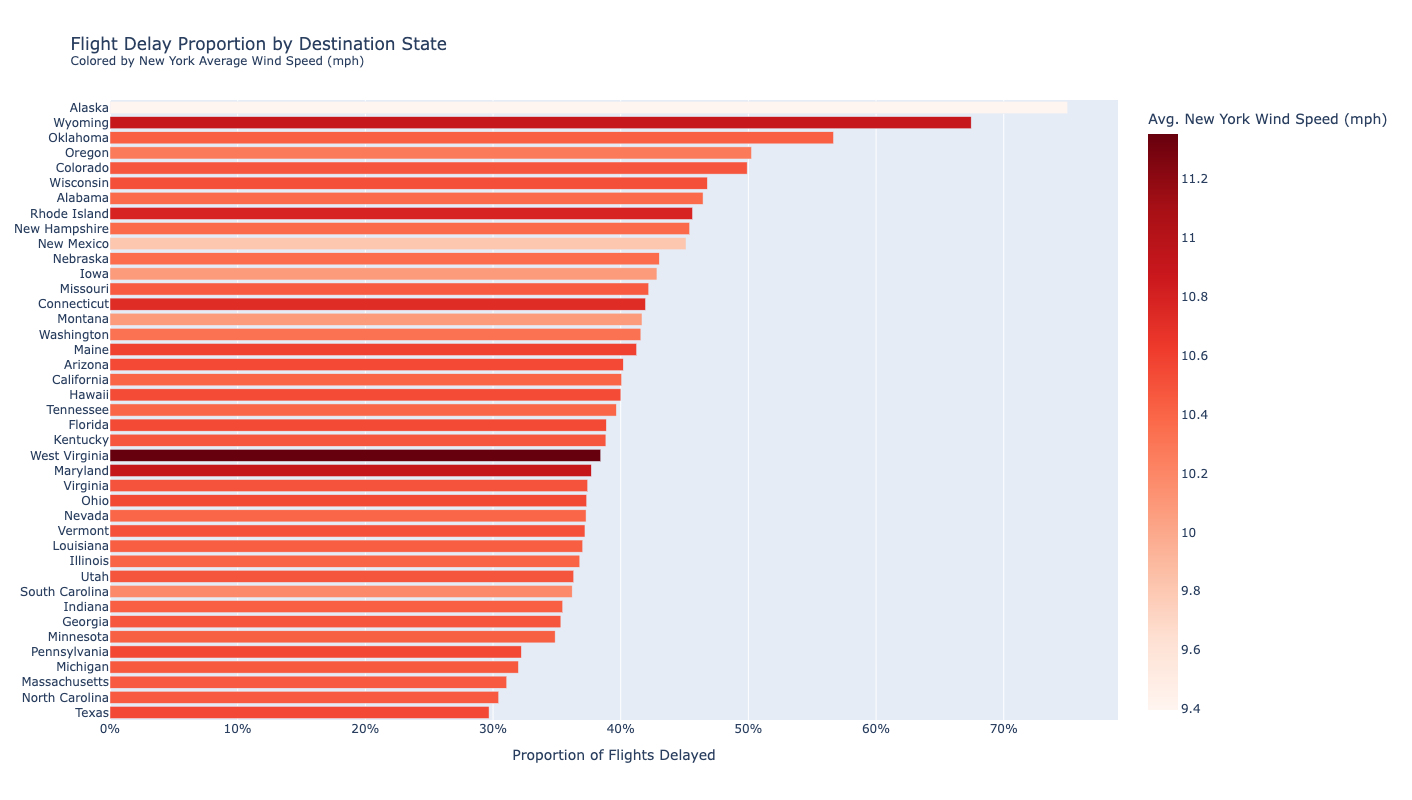

In [190]:
fig_2.show()

### As we move to test the relationship between environment and delays, the chart's second variable, Avg. New York Wind Speed (encoded by color), provides an immediate opportunity to test a related hypothesis: To what extent does origin weather (specifically wind speed ) influence these delays? A common assumption would be that poor weather at the origin (i.e. high wind speeds in New York) directly correlates with a higher proportion of destination delays. However, the data here does not support such a simple conclusion. In fact, the states with the highest delay proportions (Alaska and Wyoming) are associated with lower average origin wind speeds (lighter red). Conversely, the flights encountering the highest New York wind speeds (darkest red), such as those to West Virginia and Maryland, fall into the middle to high range of the delay rankings, not at the absolute top. From this we can deduce a key insight, while origin wind speed may be a contributing factor, it is clearly not the primary driver of the most extreme delays. The graph effectively demonstrates that these two variables (origin wind and destination delays) are not strongly correlated. This is a valuable finding as it strengthens our initial hypothesis by allowing us to not simply blame the unadvantageous weather and rather focus our subsequent analysis on the more probable drivers in these scenarios, the complex operational and environmental conditions at the destination airports.

## Extra Credit

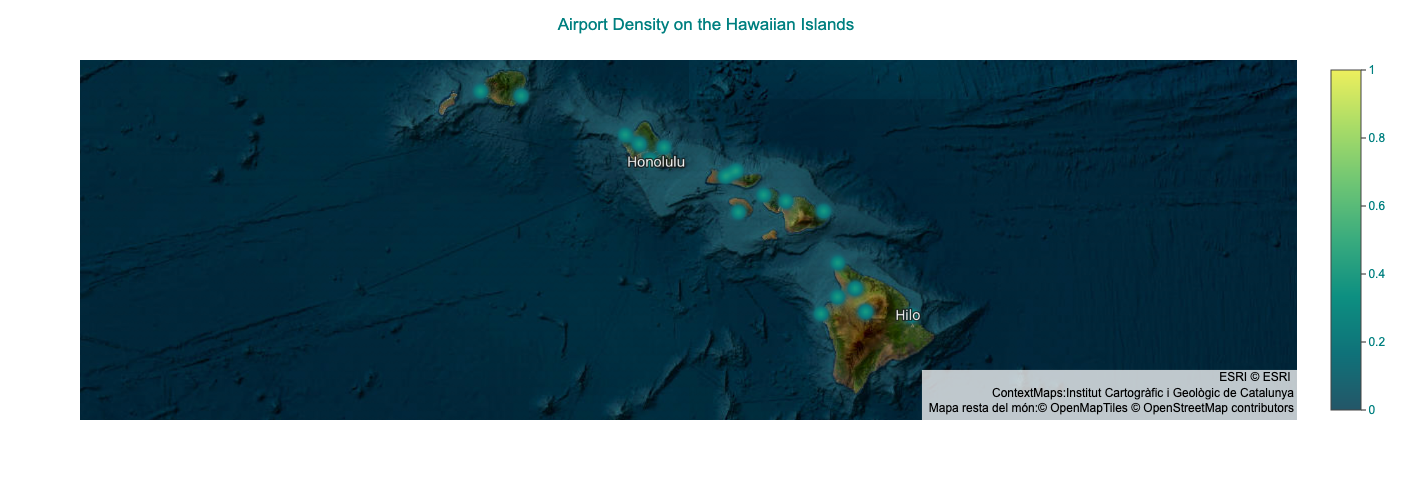

In [191]:
lat_min = 18.917
lat_max = 22.233
lon_min = -160.233
lon_max = -154.800

hawaii_airport = DF_airport_Q8[
    (DF_airport_Q8['lat'] > lat_min) & (DF_airport_Q8['lat'] < lat_max) &
    (DF_airport_Q8['lon'] > lon_min) & (DF_airport_Q8['lon'] < lon_max)
]

fig = px.density_map(
    hawaii_airport, 
    lat='lat', 
    lon='lon',
    radius = 15,  
    center = dict(lat=20.5, lon=-157.5),
    zoom = 6,
    map_style = 'satellite-streets', 
    color_continuous_scale = 'Aggrnyl'
)

fig.update_layout(
    title='Airport Density on the Hawaiian Islands',
    title_x=0.5,
    template='simple_white',
    font={'family':"Arial, monospace", 'size':12, 'color':"#008080"},
    width = 1000,
    height=500 
)

fig.show()